In [63]:
# Import Dependencies
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [64]:
# Set File path for original Data Set
shark_attack_csv = 'data_files/attacks.csv'

In [65]:
# Read CSV into a Data Frame
shark_df = pd.read_csv(shark_attack_csv, encoding='iso-8859-1')

In [66]:
shark_df.shape

(6302, 24)

In [67]:
#View Sample
shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN
2,2018.06.09,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301,NaN,NaN
3,2018.06.08,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300,NaN,NaN
4,2018.06.04,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299,NaN,NaN


In [68]:
# Removes two unneccessary columns
del shark_df['Unnamed: 22']
del shark_df['Unnamed: 23']
del shark_df['Case Number']
del shark_df['Investigator or Source']
del shark_df['href formula']
del shark_df['href']
del shark_df['Case Number.1']
del shark_df['Case Number.2']
del shark_df['original order']
del shark_df['pdf']
del shark_df['Name']

In [69]:
# Update columns that have extra spaces
shark_df = shark_df.rename(columns={"Sex ": "Sex", "Species ": "Species"})

In [70]:
# Update blank cells in columns to "Unknown" instead of dropping those rows
shark_df['Species'] = shark_df['Species'].replace({np.nan: 'Non-Disclosed'})
shark_df["Sex"] = shark_df["Sex"].replace({np.nan: "Non-Disclosed"})

In [71]:
# Standard values in column "Fatal (Y/N)"
shark_df["Fatal (Y/N)"] = shark_df["Fatal (Y/N)"].replace({np.nan: "Uncomfirmed", "UNKNOWN": "Uncomfirmed", " N": "N", 
                                                           "2017": "Uncomfirmed", "M": "Uncomfirmed", "N ": "N", "y": "Y"})

# Activity 

In [72]:
# Need to standardize list of activities to fix spelling errors and group similar activities
activities = shark_df["Activity"].unique()
for activity in activities:
    print(activity)

Paddling
Standing
Surfing
Free diving
Kite surfing
Swimming
Fishing
Walking
Feeding sharks
Boogie boarding
Scuba diving
Paddle-skiing
Body boarding
Windsurfing
Stand-Up Paddleboarding
Wading
Scuba Diving
Kayak fishing for sharks
Cleaning fish
Snorkeling
Spearfishing
nan
Diving
Fishing / Wading
2 boats capsized
Night bathing
Surfing 
Kayaking / Fishing
Kayaking
Body surfing
Swimming, poaching abalone
Canoeing
SUP
Skimboarding
Touching a shark
Fishing 
Attempting to lasso a shark
Photo shoot
Paddle boarding
Kakaying
Washing hands
Grabbing shark for a selfie
Kayak fishing
Tagging sharks
Surf skiing 
Surf fishing
Floating
Cage Diving
Surfng
SUP Foil boarding
Lobstering
Fishing in Alabama Deep Fishing Rodeo
Fishing for squid
Fishing for sharks
Floating in tube
Teasing a shark
Surf-skiing
Diving for beche-de-mer
Feeding stingrays?
Kayak Fishing
Sea disaster
Lobster fishing
Swimming / Wading
Fishing for shrimp
Photographing fish
Scallop diving on hookah
Treading water
Body boarding 
Playing i

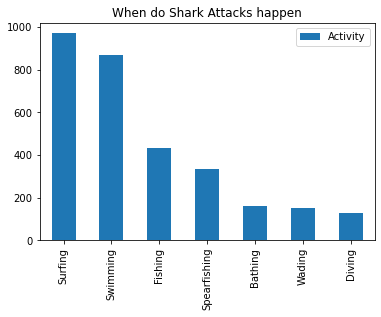

In [73]:
shark_activity=shark_df["Activity"].value_counts().to_frame()
activity_df=shark_activity[shark_activity['Activity']>100]
activity_df.plot(kind="bar",title="When do Shark Attacks happen")
plt.show()

# Species 


In [74]:
# Need to standardize list of species to remove sizes and non-species to 'Non-Disclosed'
sharks = shark_df["Species"].unique()
for shark in sharks:
    print(shark)

White shark
Non-Disclosed
2 m shark
Tiger shark, 3m
Tiger shark
Lemon shark, 3'
Bull shark, 6'
Grey reef shark
Invalid incident
Tawny nurse shark, 2m
Shark involvement not confirmed
Questionable
3 m shark
White shark, 3.5 m
White shark, 2.5 m
6' shark
Juvenile bull shark
Bull shark
Tiger shark, 12'
Wobbegong shark
3.5 m shark
1.8 m shark
Blacktip shark
Juvenile white shark,  2.7 to 3.2 m
Bull shark, 2 m
Possibly a wobbegong
Injury believed caused by an eel, not a shark
Galapagos shark?
2m shark
Bull shark, 3 m 
Grey reef shark. 2 m
small shark
Wobbegong shark?
Juvenile nurse shark
Nurse shark. 5'
Tiger shark, female
Some drowned but other may have been killed by blue sharks
White shark, 4.6 m
Cookiecutter shark
Wobbegong shark, 1 m
White shark, 4.5 m
Spinner shark, 4 to 5 feet
Tiger shark, 8 to 10 feet
8' shark
Death may have been due to drowning
5' shark
4' to 5' shark
Porbeagle, 1.5 m
White shark, 3.5m
5' to 6' shark
White shark, 3 to 3.5m 
Nurse shark
White shark, 3 m
Shark involvem

In [75]:
shark_df['Species'].value_counts()

Non-Disclosed                                                                                                                  2838
White shark                                                                                                                     163
Shark involvement prior to death was not confirmed                                                                              105
Invalid                                                                                                                         102
Shark involvement not confirmed                                                                                                  88
                                                                                                                               ... 
[4.5' to 5'] shark                                                                                                                1
3.5 m [11.5'] female white shark named "Notchfin"                           

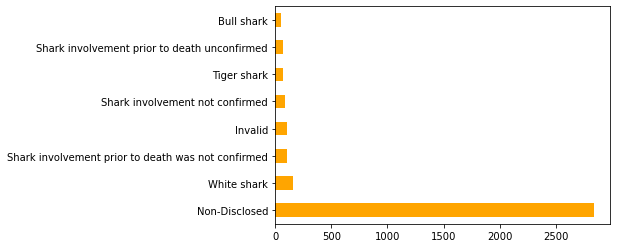

In [76]:
species_df = shark_df['Species'].value_counts()
species_df[species_df>50].plot.barh(color='orange')
plt.show()

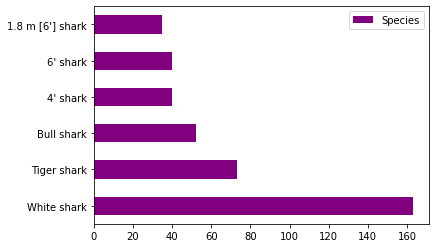

In [77]:
species_df = shark_df['Species'].value_counts().to_frame()
species_df=species_df.drop(['Non-Disclosed', 'Shark involvement prior to death was not confirmed','Invalid',
                            'Shark involvement not confirmed','Shark involvement prior to death unconfirmed',
                            'Questionable incident'])
species_df[species_df['Species']>34].plot.barh(color='purple')
plt.show()

# Date 

In [78]:
shark_df['Date'].value_counts() 

1957                                                       11
1942                                                        9
1956                                                        8
1950                                                        7
1958                                                        7
                                                           ..
13-Jun-59                                                   1
1898 (soon after the close of the Spanish-American War)     1
22-Mar-06                                                   1
01-Nov-1896                                                 1
4-Jan-02                                                    1
Name: Date, Length: 5389, dtype: int64

In [79]:
shark_df["Date"] = shark_df["Date"].replace({"06-26-1890": "26-Jun-1890"})

In [80]:
#extract data only with the format day-month-year
shark_df['Cleaned Date']=shark_df['Date'].str.extract(r'(\d+-[\w]+-\d+)')
#extract day
shark_df['Day']=shark_df['Cleaned Date'].str.extract(r'(\d+)')
#extract month
shark_df['Month']=shark_df['Cleaned Date'].str.extract(r'(-\w+-)')
shark_df['Month']=shark_df['Month'].str.replace('-','')
shark_df["Month"] = shark_df["Month"].replace({"Sept": "Sep"})

In [81]:
shark_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Cleaned Date,Day,Month
0,25-Jun-18,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,25-Jun-18,25,Jun
1,18-Jun-18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,Non-Disclosed,18-Jun-18,18,Jun
2,9-Jun-18,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Non-Disclosed,9-Jun-18,9,Jun
3,8-Jun-18,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,8-Jun-18,8,Jun
4,4-Jun-18,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",4-Jun-18,4,Jun


## Year

In [82]:
shark_df['Year'] = shark_df['Year'].fillna(0)
shark_df['Year'] = shark_df['Year'].astype(int)
#extract the rows which the year is greater than 0
shark_df=shark_df[shark_df['Year']>1959]

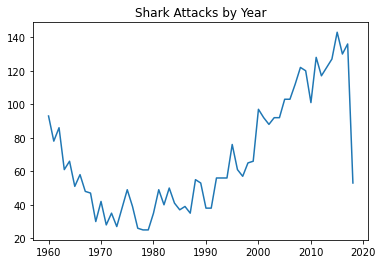

In [83]:
Years_values = shark_df['Year'].value_counts().sort_index()
Years_values.plot(title="Shark Attacks by Year")
plt.show()

## Month

In [84]:
shark_df["Month"] = shark_df["Month"].replace({"Sept": "Sep"})
shark_df["Month"] = shark_df["Month"].replace({"March": "Mar"})
shark_df["Month"] = shark_df["Month"].replace({"Ap": "Apr"})

In [85]:
shark_df.Month.value_counts()

Jul    408
Aug    388
Sep    383
Jun    347
Jan    316
Apr    312
Oct    310
Mar    262
May    260
Dec    259
Nov    243
Feb    242
Name: Month, dtype: int64

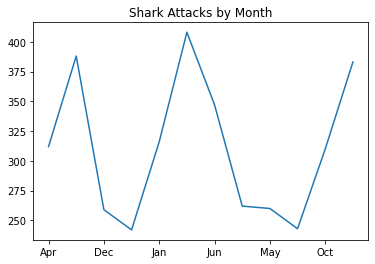

In [86]:
month_values = shark_df['Month'].value_counts().sort_index()
month_values.plot(title="Shark Attacks by Month")
plt.show()

## Day

In [87]:
shark_df["Day"] = shark_df["Day"].replace({"01": "1"})
shark_df["Day"] = shark_df["Day"].replace({"02": "2"})
shark_df["Day"] = shark_df["Day"].replace({"03": "3"})
shark_df["Day"] = shark_df["Day"].replace({"04": "4"})
shark_df["Day"] = shark_df["Day"].replace({"05": "5"})
shark_df["Day"] = shark_df["Day"].replace({"06": "6"})
shark_df["Day"] = shark_df["Day"].replace({"07": "7"})
shark_df["Day"] = shark_df["Day"].replace({"08": "8"})
shark_df["Day"] = shark_df["Day"].replace({"09": "9"})

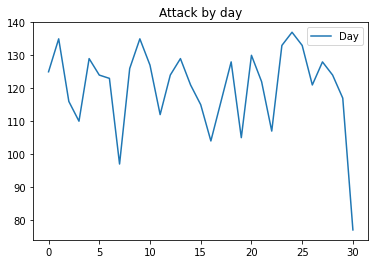

In [88]:
shark_df_day=shark_df.Day.value_counts()
new_day_df=shark_df_day.reset_index()
new_day_df['index']=new_day_df['index'].astype(int)
new_day_df=new_day_df.sort_values(by="index").reset_index(drop=True).drop(columns=['index'])
new_day_df.plot(kind="line",title="Attack by day")
plt.show()

# Type

In [89]:
shark_df.Type.value_counts()

Unprovoked      3037
Provoked         367
Invalid          343
Boat             111
Boating           92
Sea Disaster      78
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [90]:
shark_df["Type"] = shark_df["Type"].replace({"Boat": "Boating"})
shark_df["Type"] = shark_df["Type"].replace({"Boatomg": "Boating"})

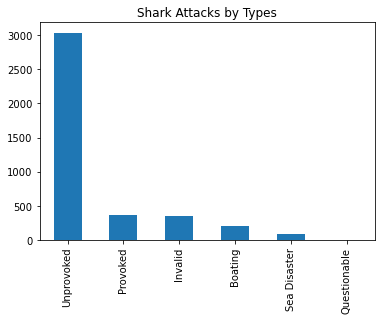

In [91]:
type_value=shark_df.Type.value_counts()
type_value.plot(kind="bar",title="Shark Attacks by Types")
plt.show()

# Need to finish Data Cleanup for Country, Area, Location

In [92]:
# Cleanup and normalize Countries
countries = shark_df["Country"].unique()
for country in countries:
    print(country)

USA
AUSTRALIA
MEXICO
BRAZIL
ENGLAND
SOUTH AFRICA
THAILAND
COSTA RICA
MALDIVES
BAHAMAS
NEW CALEDONIA
ECUADOR
MALAYSIA
LIBYA
nan
CUBA
MAURITIUS
NEW ZEALAND
SPAIN
SAMOA
SOLOMON ISLANDS
JAPAN
EGYPT
ST HELENA, British overseas territory
COMOROS
REUNION
FRENCH POLYNESIA
UNITED KINGDOM
UNITED ARAB EMIRATES
PHILIPPINES
INDONESIA
CHINA
COLUMBIA
CAPE VERDE
Fiji
DOMINICAN REPUBLIC
CAYMAN ISLANDS
ARUBA
MOZAMBIQUE
FIJI
PUERTO RICO
ITALY
ATLANTIC OCEAN
GREECE
ST. MARTIN
FRANCE
PAPUA NEW GUINEA
TRINIDAD & TOBAGO
KIRIBATI
ISRAEL
DIEGO GARCIA
TAIWAN
JAMAICA
PALESTINIAN TERRITORIES
GUAM
SEYCHELLES
BELIZE
NIGERIA
TONGA
SCOTLAND
CANADA
CROATIA
SAUDI ARABIA
CHILE
ANTIGUA
KENYA
RUSSIA
TURKS & CAICOS
UNITED ARAB EMIRATES (UAE)
AZORES
SOUTH KOREA
MALTA
VIETNAM
MADAGASCAR
PANAMA
SOMALIA
NEVIS
BRITISH VIRGIN ISLANDS
NORWAY
SENEGAL
YEMEN
GULF OF ADEN
Sierra Leone
ST. MAARTIN
GRAND CAYMAN
Seychelles
LIBERIA
VANUATU
MEXICO 
HONDURAS
VENEZUELA
SRI LANKA
 TONGA
URUGUAY
INDIA
MICRONESIA
CARIBBEAN SEA
OKINAWA
TANZANIA

In [93]:
shark_df["Country"] = shark_df["Country"].replace({np.nan: "UNKOWN", "ST HELENA, British overseas territory": "ST HELENA", "ST. MAARTIN": "ST MARTIN", "ST. MARTIN": "ST MARTIN",
                                                   "Fiji": "FIJI", "Sierra Leone": "SIERRA LEONE", "MID-PACIFC OCEAN": "MID PACIFC OCEAN", "EGYPT ": "EGYPT", 
                                                   " TONGA": "TONGA", "EGYPT / ISRAEL": "EGYPT", "ANDAMAN ISLANDS": "ANDAMAN AND NICOBAR ISLANDS", 
                                                   "RED SEA / INDIAN OCEAN": "YEMEN", "ANDAMAN / NICOBAR ISLANDAS": "ANDAMAN AND NICOBAR ISLANDS", "YEMEN ": "YEMEN", 
                                                   "SUDAN?": "SUDAN", "IRAN / IRAQ": "IRAN", " PHILIPPINES": "PHILIPPINES", "REUNION": "REUNION ISLAND", 
                                                   "SOLOMON ISLANDS / VANUATU": "SOLOMON ISLANDS", "ITALY / CROATIA": "CROATIA", "Seychelles": "SEYCHELLES", 
                                                   "OCEAN": "JAPAN", "INDIAN OCEAN?": "INDIAN OCEAN", "EQUATORIAL GUINEA / CAMEROON": "CAMEROON", 
                                                   "Coast of AFRICA": "ST THOMAS", "Between PORTUGAL & INDIA": "MEDITERRANEAN SEA", "RED SEA?": "RED SEA", 
                                                   "ASIA?": "UNKNOWN", "CEYLON (SRI LANKA)": "SRI LANKA", "UNITED ARAB EMIRATES (UAE)": "UNITED ARAB EMIRATES",
                                                   "MEXICO ": "MEXICO", "NICARAGUA ": "NICARAGUA", "NORTH ATLANTIC OCEAN ": "NORTH ATLANTIC OCEAN", "PACIFIC OCEAN ": "PACIFIC OCEAN"})

In [94]:
# Cleanup and normalize Area
areas = shark_df["Area"].unique()
for area in areas:
    print(area)

California
Georgia
Hawaii
New South Wales
Colima
Pernambuco
Florida
Queensland
South Carolina
Cornwall
Westerm Australia
Eastern Cape Province
Hua Hin
Cocos Island
Western Australia
Alifu Alifu Atoll
Western Cape Province
New Providence
Alagoas
nan
Victoria
KwaZulu-Natal
Boi Island, Victoria
Galapagos Islands
Fernando de Noronha
Sepang
Holquin Province
Pamplemousses 
South Australia
North Island
New York
Canary Islands
 Upolu Island
Shizuoka Prefecture
Texas
Castellón
Massachusetts
Red Sea Protectorate
New Providence District
40 miles off Grand Bahama Island
Ascension Island
New Jersey
Majorca
Washington
Tabasco
Anjouan
Ibiza Island
Marquesas
South Devon
New Providence 
Sharjah, 
Baja California Sur
Saint-Leu
South Island
Luzon Island
Great Exuma
Saint-Andre
Bimini
Bali
Tuamotos
Oregon
North Province
New Providence Island
Alicante Province
Hong Kong
Kochi Prefecture
Tasmania
Abaco Islands
Alabama
North Carolina
Isla Provedencia
Suez
Grand Terre
Boa Vista Island
Vanua Levu
Santa Catarin

# Time 

In [95]:
shark_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Cleaned Date,Day,Month
0,25-Jun-18,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,25-Jun-18,25,Jun
1,18-Jun-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,Minor injury to left thigh,N,14h00 -15h00,Non-Disclosed,18-Jun-18,18,Jun
2,9-Jun-18,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,Injury to left lower leg from surfboard skeg,N,07h45,Non-Disclosed,9-Jun-18,9,Jun
3,8-Jun-18,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,8-Jun-18,8,Jun
4,4-Jun-18,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",4-Jun-18,4,Jun


In [96]:
shark_df.Time.value_counts()

Afternoon               137
11h00                   108
Morning                 100
15h00                    92
14h00                    89
                       ... 
14h34                     1
14h00  -15h00             1
Shortly before 13h00      1
17h40                     1
13h23                     1
Name: Time, Length: 328, dtype: int64

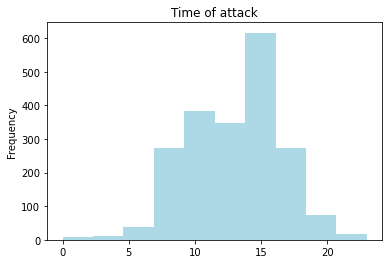

In [97]:
shark_df['Time'] = shark_df['Time'].str.extract("([0-9]+)", expand=False).dropna().astype(int)
shark_df_time = shark_df[shark_df['Time']<25]['Time']
shark_df_time.plot(kind='hist', color='lightblue', title= "Time of attack")
plt.show()